In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jhashanku007/devnagri-hindi-dataset

Saving kaggle.json to kaggle.json
 96% 152M/159M [00:00<00:00, 179MB/s]
100% 159M/159M [00:00<00:00, 172MB/s]


In [ ]:
!unzip "devnagri-hindi-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10299.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10300.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10301.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10302.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10303.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10304.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10306.png  
  inflating: devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/digit_7/10307.png  
  inflating: devanagarihandwr

In [ ]:
train_path = "/content/devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Train/"
test_path = "/content/devanagarihandwrittencharacterdataset/DevanagariHandwrittenCharacterDataset/Test/"

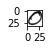

digit_0


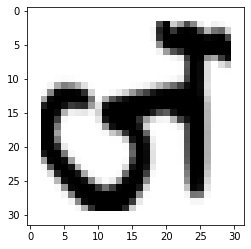

character_8_ja


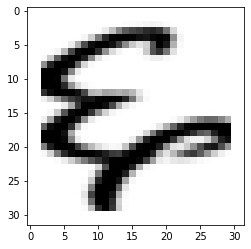

digit_6


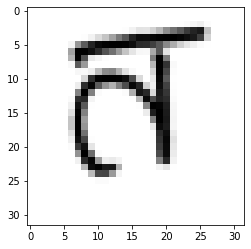

character_16_tabala


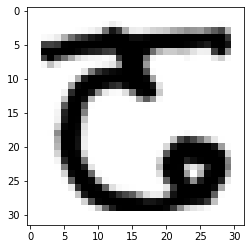

character_14_dhaa


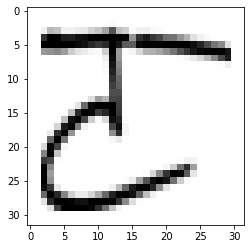

character_11_taamatar


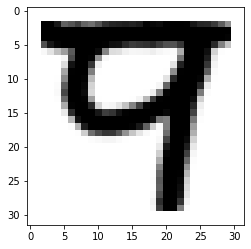

character_21_pa


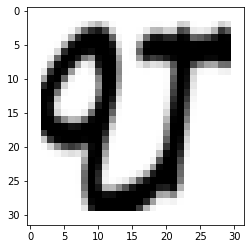

character_17_tha


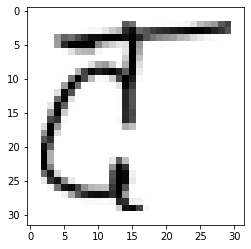

character_18_da


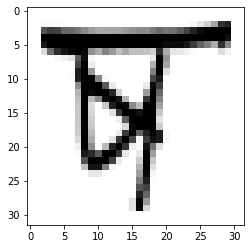

character_31_petchiryakha


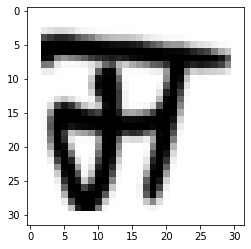

character_25_ma


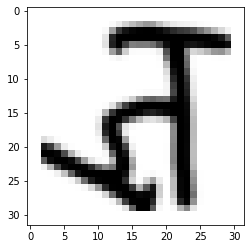

character_36_gya


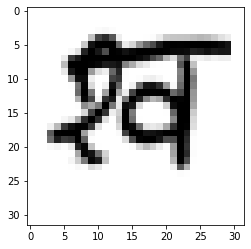

character_2_kha


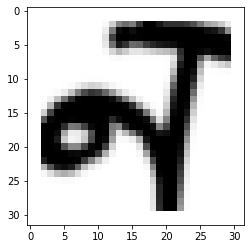

character_20_na


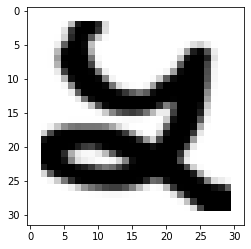

digit_5


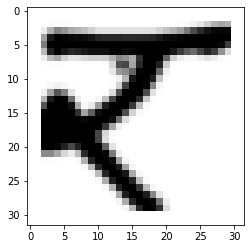

character_27_ra


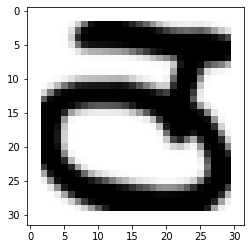

character_12_thaa


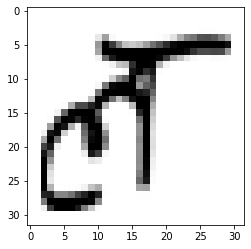

character_28_la


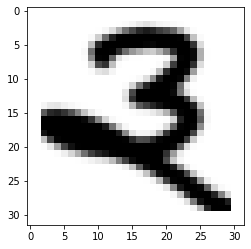

digit_3


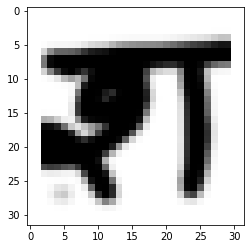

character_30_motosaw


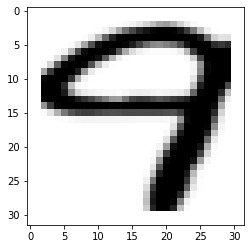

digit_1


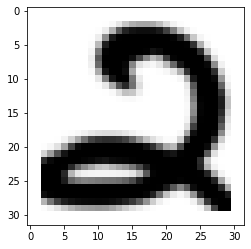

digit_2


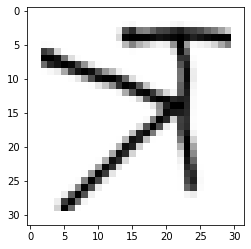

character_35_tra


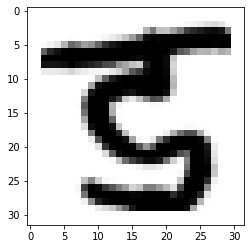

character_13_daa


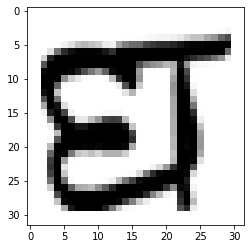

character_4_gha


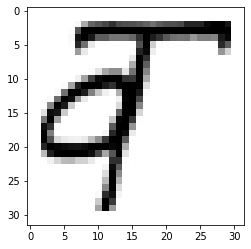

character_29_waw


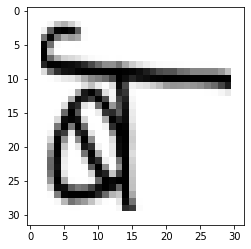

character_23_ba


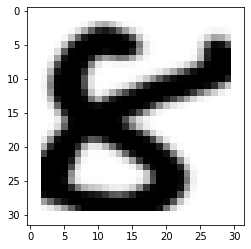

digit_4


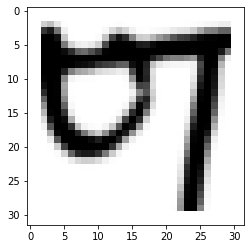

character_15_adna


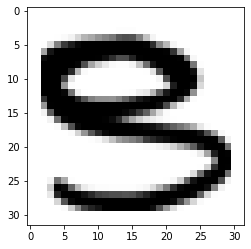

digit_9


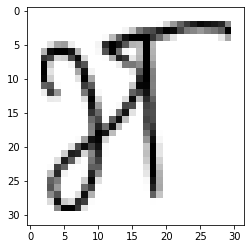

character_24_bha


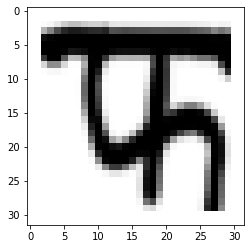

character_22_pha


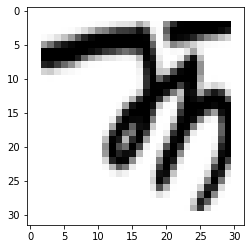

character_9_jha


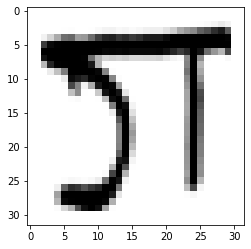

character_3_ga


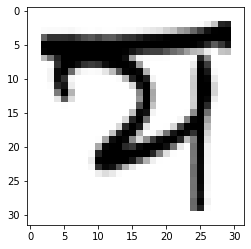

character_26_yaw


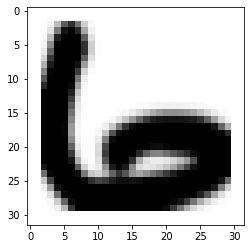

digit_7


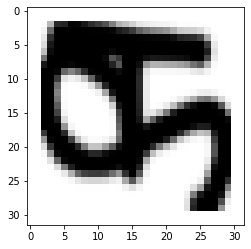

character_1_ka


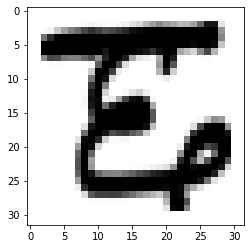

character_7_chha


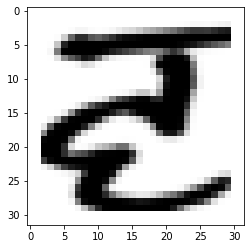

character_33_ha


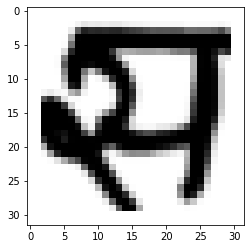

character_32_patalosaw


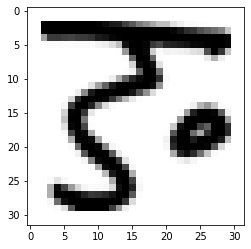

character_5_kna


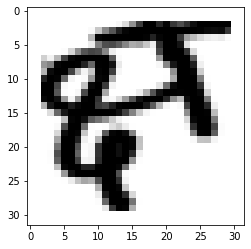

character_34_chhya


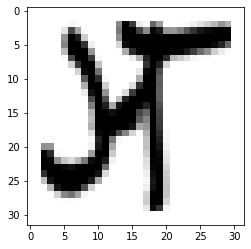

character_10_yna


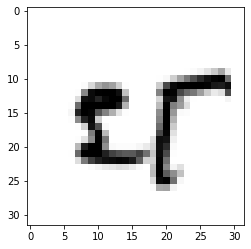

character_19_dha


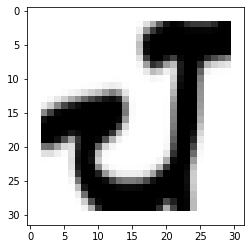

character_6_cha


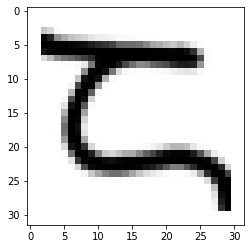

digit_8


In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
fig = plt.figure()
i=1
for filename in os.listdir(train_path):
  if i<47:
    fig.add_subplot(12,4,i)
    i+=1
    for f in os.listdir(train_path+filename):
      img = cv2.imread(train_path+filename+"/"+f)
      imagem = cv2.bitwise_not(img)
      plt.imshow(imagem)
      plt.show()
      print(filename)
      break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = False, validation_split = 0.13)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path, target_size = (32, 32), batch_size = 32, class_mode = 'categorical')

Found 78200 images belonging to 46 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path, target_size = (32, 32), batch_size = 32, class_mode = 'categorical')

Found 13800 images belonging to 46 classes.


In [ ]:
Labels = train_set.class_indices
print(Labels)
num_classes = len(Labels)
print(num_classes)

{'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'digit_7': 43, 'digit_8': 4

In [ ]:
key_list = list(Labels.keys())
# print(key_list)  ##isko sort krne ka aur koi tarika hai??
key_list

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [ ]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]
ls = os.listdir(train_path)
ls.sort(key = natural_keys)

In [ ]:
import re 
key_list = ['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']
new_list = []
for f in key_list:
  if f.startswith("character_"):
    nm = ""
    for x in f:
      if x.isdigit():
        nm = nm+x
    if len(nm)==1:
      new_list.append("0"+nm+f)
    else:
      nlist.append(nm+f)
  else:


In [ ]:
print(ls,end  ='')

['character_1_ka', 'character_2_kha', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

In [ ]:
import keras

In [ ]:
# Building the Model Architecture

model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(train_set, batch_size=128, epochs=5, verbose=1, validation_data=test_set,callbacks=[early_stopping_cb])


Epoch 1/5
2444/2444 [==============================] - 31s 10ms/step - loss: 1.3692 - accuracy: 0.6246 - val_loss: 0.2736 - val_accuracy: 0.9165
Epoch 2/5
2444/2444 [==============================] - 23s 9ms/step - loss: 0.2565 - accuracy: 0.9193 - val_loss: 0.2207 - val_accuracy: 0.9305
Epoch 3/5
2444/2444 [==============================] - 23s 9ms/step - loss: 0.1690 - accuracy: 0.9454 - val_loss: 0.1614 - val_accuracy: 0.9491
Epoch 4/5
2444/2444 [==============================] - 24s 10ms/step - loss: 0.1230 - accuracy: 0.9591 - val_loss: 0.1593 - val_accuracy: 0.9514
Epoch 5/5
2444/2444 [==============================] - 23s 9ms/step - loss: 0.0953 - accuracy: 0.9694 - val_loss: 0.1409 - val_accuracy: 0.9593


In [ ]:
score = model.evaluate_generator(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Loss: 0.14086732268333435
Test accuracy: 0.9593478441238403


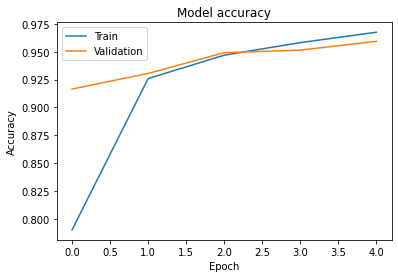

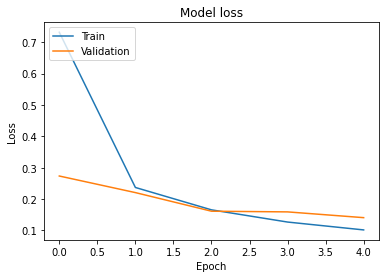

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
Characters = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह क्ष त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'

In [ ]:
Characters = Characters.split(' ')

In [ ]:
Cha_Uni = {}
for j,i in enumerate(ls):
    Cha_Uni[i] = Characters[j]
Cha_Uni

{'character_10_yna': 'ञ',
 'character_11_taamatar': 'ट',
 'character_12_thaa': 'ठ',
 'character_13_daa': 'ड',
 'character_14_dhaa': 'ढ',
 'character_15_adna': 'ण',
 'character_16_tabala': 'त',
 'character_17_tha': 'थ',
 'character_18_da': 'द',
 'character_19_dha': 'ध',
 'character_1_ka': 'क',
 'character_20_na': 'न',
 'character_21_pa': 'प',
 'character_22_pha': 'फ',
 'character_23_ba': 'ब',
 'character_24_bha': 'भ',
 'character_25_ma': 'म',
 'character_26_yaw': 'य',
 'character_27_ra': 'र',
 'character_28_la': 'ल',
 'character_29_waw': 'व',
 'character_2_kha': 'ख',
 'character_30_motosaw': 'श',
 'character_31_petchiryakha': 'ष',
 'character_32_patalosaw': 'स',
 'character_33_ha': 'ह',
 'character_34_chhya': 'क्ष',
 'character_35_tra': 'त्र',
 'character_36_gya': 'ज्ञ',
 'character_3_ga': 'ग',
 'character_4_gha': 'घ',
 'character_5_kna': 'ङ',
 'character_6_cha': 'च',
 'character_7_chha': 'छ',
 'character_8_ja': 'ज',
 'character_9_jha': 'झ',
 'digit_0': '०',
 'digit_1': '१',
 'digit_2':

In [ ]:
import numpy as np

In [ ]:
def predict_(img_path):
  img = cv2.imread(img_path) 
  im = cv2.resize(img,  (32, 32))
  gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  imagem = cv2.bitwise_not(gray)
  imagem = imagem/255.
  plt.imshow(imagem)
  imagem_resize = imagem.reshape(imagem.shape[0], 32, 1)
  x = np.expand_dims(imagem_resize, axis=0)
  y_pred = model.predict(x)
  print(Cha_Uni[key_list[np.argmax(y_pred)]])

In [ ]:
files.upload()

{}

In [ ]:
predict_("00.png")

error: ignored

In [ ]:
predict_("002.png")

In [ ]:
predict_("01.png")

In [ ]:
predict_("000.png")

In [ ]:
predict_("001.png")

In [ ]:
predict_("003.png")

In [ ]:
predict_("004.png")